# Clustering<span class="tocSkip"></span>

The goal of this program is to visualize and cluster the data.

## Importing files and liberaries:
* Liberaries:

In [16]:
import numpy as np
import pandas as pd
import random as rnd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set()  
plt.rcParams['figure.figsize'] = [10, 5] 
plt.rcParams['lines.markeredgewidth'] = 1  

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

* files:

In [2]:
read_data = open('Data\Voorbeeld_clusterdata.txt')
data = read_data.read()
data = data.splitlines()
read_data.close()

line_data = []

for line in data:
    segment = []
    for elem in line.split():
        segment.append(float(elem))
    line_data.append(segment)
    
cordinates = ['z','y','x','w','v','u','t','s']
df_data = pd.DataFrame(line_data,columns=['ID','z','y','x','w','v','u','t','s']).set_index('ID')
df_data

,z,y,x,w,v,u,t,s
ID,,,,,,,,
846160.0,0.388,0.329,0.690,0.900,0.626,0.621,0.399,0.370
820434.0,-0.296,-0.503,-0.454,-0.868,-0.721,-0.918,-0.486,-0.582
849103.0,-0.246,-0.935,-0.277,-0.175,-0.278,-0.075,-0.236,-0.417
846353.0,0.769,0.929,0.977,1.095,1.058,0.864,0.689,0.492
848613.0,-0.365,-0.760,-0.305,-0.293,-0.364,-0.155,-0.472,-0.606
...,...,...,...,...,...,...,...,...
760857.0,1.243,1.824,1.569,2.671,1.644,1.305,1.541,1.094
805218.0,0.810,0.641,0.545,0.973,1.137,0.518,0.711,0.355
945014.0,-0.486,-0.743,-0.066,0.046,0.364,0.176,0.172,0.006


## Visualising the data:
* Value analasis:

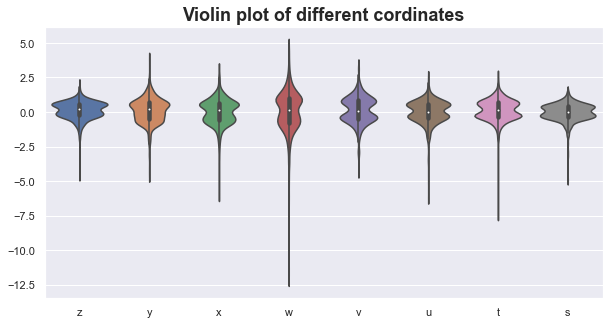

In [3]:
sns.violinplot(data=df_data[cordinates])
plt.title('Violin plot of different cordinates', weight='bold', size=18);

* scatter plot:

In [5]:
def plot(title,cord):
    x = (df_data[cord[0]] + df_data[cord[1]]) / 2
    y = (df_data[cord[2]] + df_data[cord[3]]) / 2
    z = (df_data[cord[4]] + df_data[cord[5]]) / 2
    c = (df_data[cord[6]] + df_data[cord[7]]) / 2
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
    fig.colorbar(img);
    plt.title(title,weight='bold',size=18)

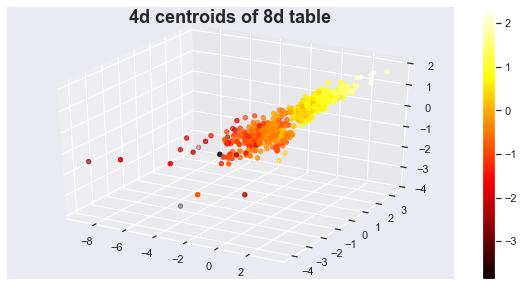

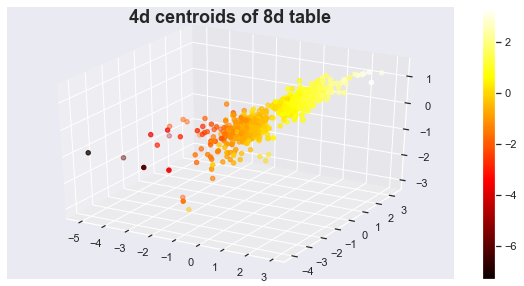

In [6]:
for i in range(2):
    rnd.shuffle(cordinates)
    plot('4d centroids of 8d table', cordinates)

## K-means:

In [56]:
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return list(classification)

In [60]:
clf = K_Means()
clf.fit(df_data.values);
clf.centroids

385.924264233352
138.52161989122453
305.20851251143796
8.824709794122258
172.23638075490376
102.10911734665784
2.2678818341624027
195.60524124870665
66.41274808067834
103.6088617036875
42.66955953348769
68.82786052366563
26.2624633570813
67.16090299817462
25.29984787274011
29.667390730252155
16.68377431356027
13.128052867974802
8.61124506601082
37.277604322420636
7.197969266361824
3.9565310034447503
2.082154369006062


{0: array([0.59929317, 0.77763454, 0.76118273, 1.18838755, 0.93989558,
        0.65390361, 0.74104016, 0.44620884]),
 1: array([-0.53223636, -1.13690909, -1.90616364, -3.3466    , -1.85885455,
        -1.9344    , -1.14447273, -1.08338182]),
 2: array([-0.28659913, -0.48511329, -0.55277342, -0.72663181, -0.48174728,
        -0.45939651, -0.34248584, -0.373939  ])}